In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms


In [4]:
##Getting the Data

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [ ]:
##Data Exploration/Analysis

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [6]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [10]:
### Data Preprocessing

In [8]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [9]:
# extracting and then removing the targets from the training data 
targets = train_df['Survived']



In [10]:
train_df.drop(['Survived'], 1, inplace=True)

In [84]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# merging train data and test data for future feature engineering
# we'll also remove the PassengerID since this is not an informative feature
combined = train_df.append(test_df)
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId'], inplace=True, axis=1)

In [13]:
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
#Now let's map the title can bin them
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [15]:
#Generate a new Title column
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined['Title'] = combined['Title'].map(Title_Dictionary)

In [16]:
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [17]:
#let's get the median age based on people's gender, Pclass and Title
fill_mean = lambda g: g.fillna(g.mean())
combined['Age'] = combined.groupby(['Sex', 'Title', 'Pclass'])['Age'].apply(fill_mean)

In [18]:
# Name can be dropped now
combined.drop('Name', axis=1, inplace=True)

In [19]:
# removing the title variable
combined.drop('Title', axis=1, inplace=True)

In [20]:
# removing the Cabin variable
combined.drop('Cabin', axis=1, inplace=True)

In [21]:
# removing the Ticket variable
combined.drop('Ticket', axis=1, inplace=True)

In [22]:
#Fill out the missing fare data
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

In [23]:
# two missing embarked values - filling them with the most frequent one in the train set
combined['Embarked'].fillna('S', inplace=True)

In [24]:
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.00000,1,0,7.2500,S
1,1,female,38.00000,1,0,71.2833,C
2,3,female,26.00000,0,0,7.9250,S
3,1,female,35.00000,1,0,53.1000,S
4,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...
1304,3,male,28.31891,0,0,8.0500,S
1305,1,female,39.00000,0,0,108.9000,C
1306,3,male,38.50000,0,0,7.2500,S
1307,3,male,28.31891,0,0,8.0500,S


In [25]:
# encoding in dummy variable
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)
combined.drop('Embarked', axis=1, inplace=True)

In [26]:
# mapping gender to numerical one 
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

In [27]:
# introducing a new feature : the size of families (including the passenger)
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

In [28]:
#Prepare the training dataset
df_im_input=combined.iloc[:891]
df_im_output=targets

In [29]:
df_im_input

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.000000,1,0,7.2500,0,0,1,2
1,1,0,38.000000,1,0,71.2833,1,0,0,2
2,3,0,26.000000,0,0,7.9250,0,0,1,1
3,1,0,35.000000,1,0,53.1000,0,0,1,2
4,3,1,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1,1
887,1,0,19.000000,0,0,30.0000,0,0,1,1
888,3,0,17.360874,1,2,23.4500,0,0,1,4
889,1,1,26.000000,0,0,30.0000,1,0,0,1


In [30]:
df_im_output

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.00000,1,0,7.2500,0,0,1,2
1,1,0,38.00000,1,0,71.2833,1,0,0,2
2,3,0,26.00000,0,0,7.9250,0,0,1,1
3,1,0,35.00000,1,0,53.1000,0,0,1,2
4,3,1,35.00000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,1,28.31891,0,0,8.0500,0,0,1,1
1305,1,0,39.00000,0,0,108.9000,1,0,0,1
1306,3,1,38.50000,0,0,7.2500,0,0,1,1
1307,3,1,28.31891,0,0,8.0500,0,0,1,1


In [131]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_im_input)

In [32]:
test_data = combined.iloc[891:]
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
891,3,1,34.50000,0,0,7.8292,0,1,0,1
892,3,0,47.00000,1,0,7.0000,0,0,1,2
893,2,1,62.00000,0,0,9.6875,0,1,0,1
894,3,1,27.00000,0,0,8.6625,0,0,1,1
895,3,0,22.00000,1,1,12.2875,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
1304,3,1,28.31891,0,0,8.0500,0,0,1,1
1305,1,0,39.00000,0,0,108.9000,1,0,0,1
1306,3,1,38.50000,0,0,7.2500,0,0,1,1
1307,3,1,28.31891,0,0,8.0500,0,0,1,1


In [133]:
scaled_test = scaler.transform(test_data)

In [56]:
scaled_train = pd.DataFrame(scaled_train, columns=df_im_input.columns, index=df_im_input.index)
scaled_test =  pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

In [57]:
scaled_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0,0.1
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,0.1
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,0.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0,0.1
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0
888,1.0,0.0,0.212879,0.125,0.333333,0.045771,0.0,0.0,1.0,0.3
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0


In [36]:
##Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(scaled_train, df_im_output, test_size=0.2)
#print(X_train.shape, X_test.shape)
#print(y_train.shape, y_test.shape)

#clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
#clf.fit(X_train, y_train)

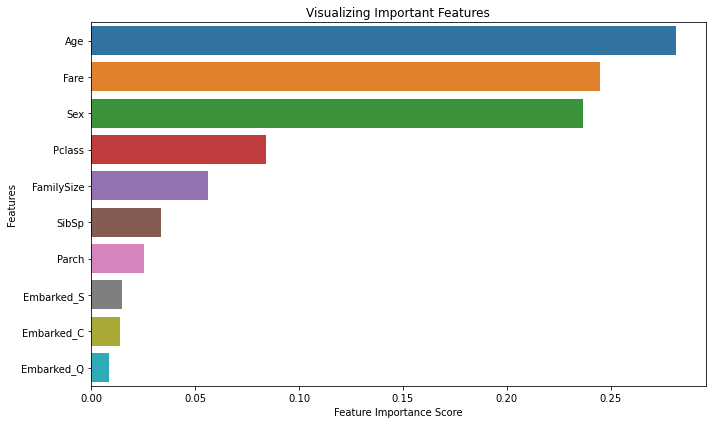

In [60]:
feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

   Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       113
           1       0.77      0.82      0.79        66

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.84      0.84       179



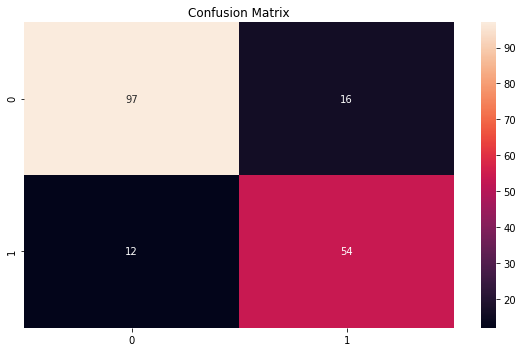

In [61]:
y_pred=clf.predict(X_test)
print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [33]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as rtree

In [40]:
#Grid Search dict
param_grid = {
    'max_features':['auto','sqrt','log2'],
    'max_depth':[5,10,15],
    'n_estimators':[100,500]
}

In [41]:
#make item combination for param_grid dict
import itertools as it
s = sorted(param_grid)
print(s)
combination=it.product(*(param_grid[Name] for Name in s))
#print(list(combination))
rtree_first=RandomForestClassifier(max_depth=5,
                                max_features='auto',
                                n_estimators=100)
score=cv(rtree_first,df_im_input,df_im_output,10)
i=0

#grid search on model
for i in list(combination):
    rtree=RandomForestClassifier(max_depth=i[0],
                                max_features=i[1],
                                n_estimators=i[2])
    scc=cv(rtree,df_im_input,df_im_output,10)
    if scc >= score:
        score = scc
        opt = i
        print(score)
print('Best Estimators :')
print(i)


    

['max_depth', 'max_features', 'n_estimators']
0.867262932680903
0.8674943979000089
0.868616381304071
Best Estimators :
(15, 'log2', 500)


In [50]:
#use opt parameters to train 
opt_model=RandomForestClassifier(max_depth=15,
                                max_features='log2',
                                n_estimators=500)
opt_model.fit(df_im_input,df_im_output.values.reshape(-1))
y_pred = opt_model.predict(test_data)
y_predp = opt_model.predict_proba(test_data)[:,1]
pred_probs = opt_model.predict_proba(df_im_input)[:,1]


In [51]:
from sklearn.metrics import roc_curve, auc
#roc_curve() returns a list of false positive rates (FPR) and true positives rates (TPR) for different configurations of the classifier used to plot the ROC.
[fpr, tpr, thr] = roc_curve(targets, pred_probs)

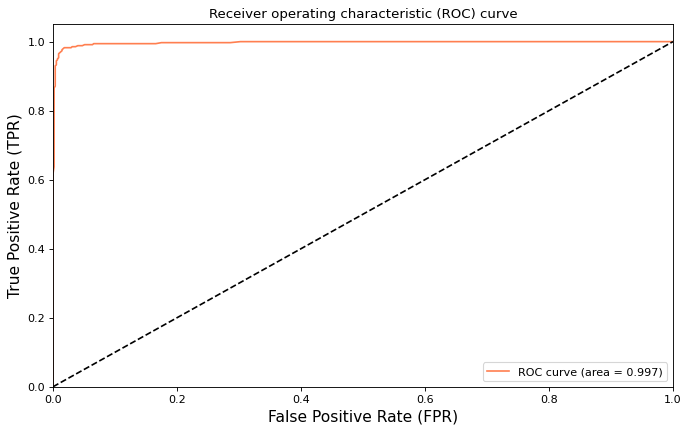

In [52]:
#plot ROC curve
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
# k-fold with index pair return
def kfold_index(x_train,k):
    if k<1:
        print('K cannot smaller than 1')
        return
    else:
        l=x_train.shape[0]#22 k=5
        tail=l%k#2
        q=l//k#4
        index=[0]
        output_index=[]
        #first n_examples % k sub_example have n_examples//k+1 elements
        for i in range(1,tail):
            index.append((i*q)+1)
        for j in range(tail,k+1):
            index.append(j*q+tail)
        for m in range(len(index)-1):
            output_index.append([index[m],index[m+1]])
        return output_index

In [41]:
import numpy as np
import pandas as pd
from pandas import DataFrame
x_train=DataFrame(np.arange(22).reshape(22,1),columns=list('t'))
x_train
kfold_index(x_train,5)

[[0, 5], [5, 10], [10, 14], [14, 18], [18, 22]]

In [39]:
def cv(model,x_train,y_train,k):
    #get kfold index
    index=kfold_index(x_train,k)
    #train each sub-combination
    auc=[]
    for i in range(k):
        cv_xtest=x_train.iloc[index[i][0]:index[i][1],:]
        #print(cv_xtest)
        cv_ytest=y_train.iloc[index[i][0]:index[i][1],]
        #print(cv_ytest)
        #drop the test sub-set
        cv_xtrain=x_train.drop(x_train.index[index[i][0]:index[i][1]])
        cv_ytrain=y_train.drop(y_train.index[index[i][0]:index[i][1]])
        
        model.fit(cv_xtrain,cv_ytrain.values.reshape(-1))
        #y_pred = model.predict(cv_xtest)
        
        #calculate the auc as the evaluation metric
        
        fpr, tpr, threshold = roc_curve(cv_ytest, model.predict_proba(cv_xtest)[:,1])
        aa = metrics.auc(fpr,tpr)
        auc.append(aa)
    return np.mean(auc)

In [118]:
print(list(combination))

[]
